# art contest leaderboard

## setup

In [1]:
import pandas as pd
import altair as alt

## load data

In [3]:
%store -r df

In [4]:
df.head()

,artist,title,comments,key,link
0,Samantha Lee,Finding Kore,4,finding-kore,https://nouveaulabelcontest.com/finding-kore/
1,Valerie Yoder,First Harvest,3,first-harvest,https://nouveaulabelcontest.com/first-harvest/
2,Samantha Lee,Gymnopedie,0,gymnopedie,https://nouveaulabelcontest.com/gymnopedie/
3,Adina Faye Karten,Playful Tyrst,0,playful-tyrst,https://nouveaulabelcontest.com/playful-tyrst/
4,Samantha Lee,Resuello Del Verano,0,resuello-del-verano,https://nouveaulabelcontest.com/resuello-del-v...


In [9]:
df.loc[lambda x: x.key == 'deep-green']

,artist,title,comments,key,link
371,Reuf Kapetanovic,Deep Green,9,deep-green,https://nouveaulabelcontest.com/deep-green/


## data processing

In [38]:
alt_df = (
    df
    .assign(
        comments = lambda x: x.comments.astype('int'),
        dummy = lambda x: [
            'deep-green' 
                if artist == 'Reuf Kapetanovic'
                else 'other'
            for artist in x.artist
        ],
        title = lambda x: [
            key
                if title == 'not found'
                else title
            for key, title in zip(x.key, x.title)
        ]
    )
)

alt_df.head()

,artist,title,comments,key,link,dummy
0,Samantha Lee,Finding Kore,4,finding-kore,https://nouveaulabelcontest.com/finding-kore/,other
1,Valerie Yoder,First Harvest,3,first-harvest,https://nouveaulabelcontest.com/first-harvest/,other
2,Samantha Lee,Gymnopedie,0,gymnopedie,https://nouveaulabelcontest.com/gymnopedie/,other
3,Adina Faye Karten,Playful Tyrst,0,playful-tyrst,https://nouveaulabelcontest.com/playful-tyrst/,other
4,Samantha Lee,Resuello Del Verano,0,resuello-del-verano,https://nouveaulabelcontest.com/resuello-del-v...,other


In [49]:
alt_df.artist.value_counts().loc[lambda x: x > 4]

not found                      30
Melissa Cain                    6
Jon Parlangeli                  6
Jeffrey Thornton Fitzgerald     6
Margaret Marquez                6
Adri Luna                       5
Daniel Henke                    5
Samantha Lee                    5
Rodney                          5
Karen Romani                    5
Britt Moorehead                 5
Leah Nadeau                     5
Michael G Teevan                5
Sean P                          5
Hilary Berens                   5
Melissa Partridge               5
Shelley Davis                   5
Carlos Lorenzana                5
Lisa Concannon                  5
Diane Turner                    5
Kat Green                       5
Shelly Synar                    5
Kelly Kchelena                  5
Jeanie Latiolais                5
Nina Ramos                      5
Diane L Oehrle                  5
Linda Hoffhines                 5
Kevin Lahvic                    5
Teri Jo Rask                    5
Ruby Lindner  

## chart

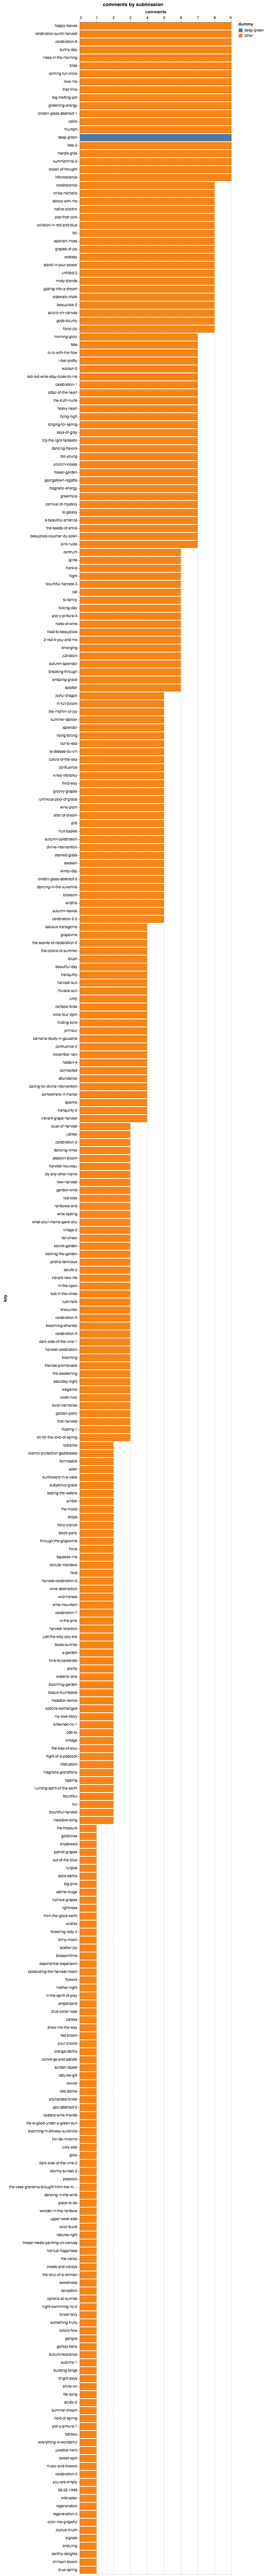

In [51]:
sort_list = list(
    alt_df
    .query('comments > 0')
    .sort_values('comments', ascending=False)
    .key
    .values
)

rank_chart = alt.Chart(
    alt_df.query('comments > 0')
).mark_bar(
).encode(
    alt.Y(
        'key:N',
        sort=sort_list
    ),
    alt.X(
        'comments:Q',
        axis=alt.Axis(orient='top')
    ),
    color='dummy:N',
    #href='link'
).properties(
    title='comments by submission'
).configure(
    #background='#abb2bf'
)

display(rank_chart)